In [1]:
from transformers import AutoModelForCausalLM, AutoTokenizer, GPTQConfig

In [4]:
from huggingface_hub import login
login()

In [7]:
model_id = "facebook/opt-125m"
tokenizer = AutoTokenizer.from_pretrained(model_id)
gptq_config = GPTQConfig(bits=4, dataset="c4", tokenizer=tokenizer)

In [8]:
quantized_model = AutoModelForCausalLM.from_pretrained(model_id, device_map="auto", quantization_config=gptq_config)

Quantizing model.decoder.layers blocks :   0%|          | 0/12 [00:00<?, ?it/s]

Quantizing layers inside the block:   0%|          | 0/6 [00:00<?, ?it/s]

Quantizing layers inside the block:   0%|          | 0/6 [00:00<?, ?it/s]

Quantizing layers inside the block:   0%|          | 0/6 [00:00<?, ?it/s]

Quantizing layers inside the block:   0%|          | 0/6 [00:00<?, ?it/s]

Quantizing layers inside the block:   0%|          | 0/6 [00:00<?, ?it/s]

Quantizing layers inside the block:   0%|          | 0/6 [00:00<?, ?it/s]

Quantizing layers inside the block:   0%|          | 0/6 [00:00<?, ?it/s]

Quantizing layers inside the block:   0%|          | 0/6 [00:00<?, ?it/s]

Quantizing layers inside the block:   0%|          | 0/6 [00:00<?, ?it/s]

Quantizing layers inside the block:   0%|          | 0/6 [00:00<?, ?it/s]

Quantizing layers inside the block:   0%|          | 0/6 [00:00<?, ?it/s]

Quantizing layers inside the block:   0%|          | 0/6 [00:00<?, ?it/s]

c:\Users\aurel\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\modeling_utils.py:4713: FutureWarning: `_is_quantized_training_enabled` is going to be deprecated in transformers 4.39.0. Please use `model.hf_quantizer.is_trainable` instead
  warnings.warn(


In [9]:
quantized_model.push_to_hub("opt-125m-gptq")
tokenizer.push_to_hub("opt-125m-gptq")

model.safetensors:   0%|          | 0.00/125M [00:00<?, ?B/s]

README.md:   0%|          | 0.00/5.17k [00:00<?, ?B/s]

c:\Users\aurel\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:147: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\aurel\.cache\huggingface\hub\models--Serione--opt-125m-gptq. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


CommitInfo(commit_url='https://huggingface.co/Serione/opt-125m-gptq/commit/950d2dd835f2c063bbd9bc8040f2ad42aa568767', commit_message='Upload tokenizer', commit_description='', oid='950d2dd835f2c063bbd9bc8040f2ad42aa568767', pr_url=None, repo_url=RepoUrl('https://huggingface.co/Serione/opt-125m-gptq', endpoint='https://huggingface.co', repo_type='model', repo_id='Serione/opt-125m-gptq'), pr_revision=None, pr_num=None)

In [10]:
gptq_config = GPTQConfig(bits=4, exllama_config={"version":2})
model = AutoModelForCausalLM.from_pretrained("Serione/opt-125m-gptq", device_map="auto", quantization_config=gptq_config)

config.json:   0%|          | 0.00/1.40k [00:00<?, ?B/s]

c:\Users\aurel\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\quantizers\auto.py:174: UserWarning: You passed `quantization_config` or equivalent parameters to `from_pretrained` but the model you're loading already has a `quantization_config` attribute. The `quantization_config` from the model will be used.However, loading attributes (e.g. ['use_cuda_fp16', 'use_exllama', 'max_input_length', 'exllama_config', 'disable_exllama']) will be overwritten with the one you passed to `from_pretrained`. The rest will be ignored.
  warnings.warn(warning_msg)


model.safetensors:   0%|          | 0.00/125M [00:00<?, ?B/s]

c:\Users\aurel\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\modeling_utils.py:4713: FutureWarning: `_is_quantized_training_enabled` is going to be deprecated in transformers 4.39.0. Please use `model.hf_quantizer.is_trainable` instead
  warnings.warn(


generation_config.json:   0%|          | 0.00/139 [00:00<?, ?B/s]

In [11]:
model.save_pretrained("lama-opt-125m-gptq")


In [13]:
model_inputs = tokenizer(["How many colors are there?"], return_tensors="pt").to("cuda")
generated_ids = quantized_model.generate(**model_inputs)
tokenizer.batch_decode(generated_ids, skip_special_tokens=True)[0]

c:\Users\aurel\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\generation\utils.py:1258: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


"How many colors are there?\nI'm not sure, but I think it's a lot"

In [ ]:
quantized_model.save_pretrained("opt-125m-gptq")
tokenizer.save_pretrained("opt-125m-gptq")

('opt-125m-gptq\\tokenizer_config.json',
 'opt-125m-gptq\\special_tokens_map.json',
 'opt-125m-gptq\\vocab.json',
 'opt-125m-gptq\\merges.txt',
 'opt-125m-gptq\\added_tokens.json',
 'opt-125m-gptq\\tokenizer.json')

In [6]:
from transformers import OPTForCausalLM, AutoTokenizer
from torch import nn

# Load the model and tokenizer
model_name = "facebook/opt-125m"
model = OPTForCausalLM.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)
model.model.decoder.layers = nn.ModuleList(list(model.model.decoder.layers)[-5:])

print(type(model))

<class 'transformers.models.opt.modeling_opt.OPTForCausalLM'>
OPTForCausalLM(
  (model): OPTModel(
    (decoder): OPTDecoder(
      (embed_tokens): Embedding(50272, 768, padding_idx=1)
      (embed_positions): OPTLearnedPositionalEmbedding(2050, 768)
      (final_layer_norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (layers): ModuleList(
        (0-4): 5 x OPTDecoderLayer(
          (self_attn): OPTAttention(
            (k_proj): Linear(in_features=768, out_features=768, bias=True)
            (v_proj): Linear(in_features=768, out_features=768, bias=True)
            (q_proj): Linear(in_features=768, out_features=768, bias=True)
            (out_proj): Linear(in_features=768, out_features=768, bias=True)
          )
          (activation_fn): ReLU()
          (self_attn_layer_norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (fc1): Linear(in_features=768, out_features=3072, bias=True)
          (fc2): Linear(in_features=3072, out_features=768, b

c:\Users\aurel\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


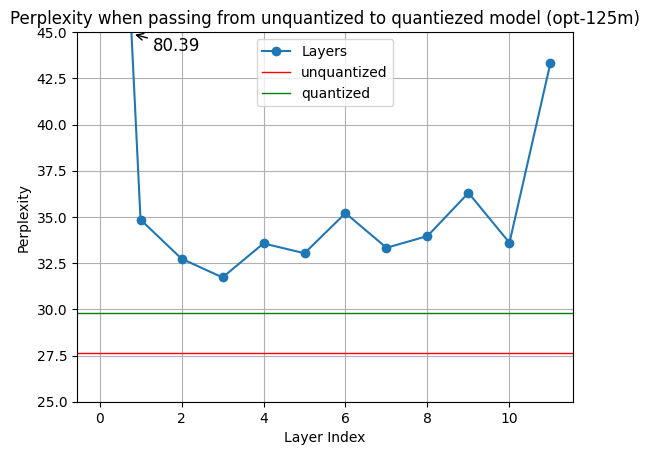

In [16]:
import matplotlib.pyplot as plt

# Given data
values = [
    80.38970947265625,
    34.85365295410156,
    32.73877716064453,
    31.72531509399414,
    33.566627502441406,
    33.034244537353516,
    35.204524993896484,
    33.33097457885742,
    33.96371841430664,
    36.301265716552734,
    33.602237701416016,
    43.33736038208008
]

# Create x values (0 to n-1 where n is the number of values)
x_values = list(range(len(values)))

# Create the line plot
plt.plot(x_values, values, label='Layers', marker='o')

# Set the y-axis limits to show values between 25 and 26
plt.ylim(25, 45)

plt.annotate('80.39', xy=(0.8, 44.9), xytext=(1.3, 44),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=12, color='black')

# Add grid, title, legend, and labels
plt.axhline(27.66, color='red', linestyle='-', linewidth=1, label='unquantized')  # Reference line
plt.axhline(29.804424285888672, color='green', linestyle='-', linewidth=1, label='quantized')
plt.title('Perplexity when passing from unquantized to quantiezed model (opt-125m)')
plt.xlabel('Layer Index')
plt.ylabel('Perplexity')
plt.legend()
plt.grid()

# Show the plot
plt.show()

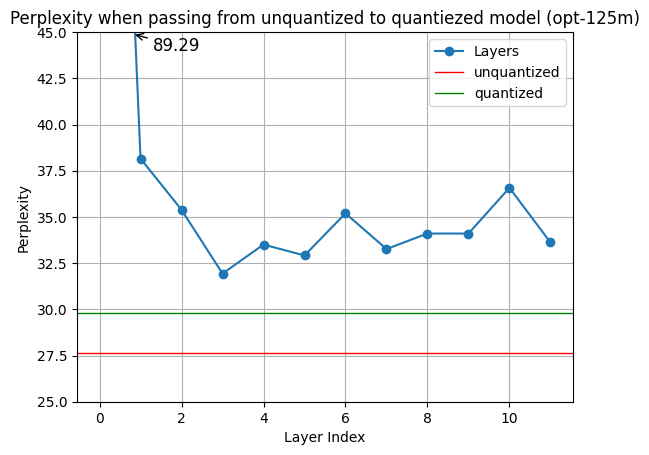

In [12]:
values = [ 
    89.29293823242188,
    38.15502166748047,
    35.38473892211914,
    31.93402099609375,
    33.503936767578125,
    32.913719177246094,
    35.19322967529297,
    33.26222610473633,
    34.1004638671875,
    34.1004638671875,
    36.57577896118164,
    33.618648529052734,
]


# Create x values (0 to n-1 where n is the number of values)
x_values = list(range(len(values)))

# Create the line plot
plt.plot(x_values, values, label='Layers', marker='o')

# Set the y-axis limits to show values between 25 and 26
plt.ylim(25, 45)

plt.annotate('89.29', xy=(0.8, 44.9), xytext=(1.3, 44),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=12, color='black')

# Add grid, title, legend, and labels
plt.axhline(27.66, color='red', linestyle='-', linewidth=1, label='unquantized')  # Reference line
plt.axhline(29.804424285888672, color='green', linestyle='-', linewidth=1, label='quantized')
plt.title('Perplexity when passing from unquantized to quantiezed model (opt-125m)')
plt.xlabel('Layer Index')
plt.ylabel('Perplexity')
plt.legend()
plt.grid()

# Show the plot
plt.show()


In [53]:
import torch

ff = torch.load('F:/Thesis/ff.pt')[-1]
tt = torch.load('F:/Thesis/tt.pt')[-1] 

# Compute the relative mean error
absolute_errors = torch.abs(ff - tt)
mean_absolute_error = torch.mean(absolute_errors)
mean_reference = torch.mean(torch.abs(tt))
# Calculate RME
rme = mean_absolute_error / mean_reference
print(rme)
#####

t = torch.load('F:/Thesis/t.pt')[-1]
f = torch.load('F:/Thesis/f.pt')[-1]

# Compute the relative mean error
absolute_errors = torch.abs(t - f)
mean_absolute_error = torch.mean(absolute_errors)
mean_reference = torch.mean(torch.abs(t))
# Calculate RME
rme = mean_absolute_error / mean_reference

print(rme)

tensor(0., device='cuda:0', dtype=torch.float16)
tensor(0.0753, device='cuda:0', dtype=torch.float16)


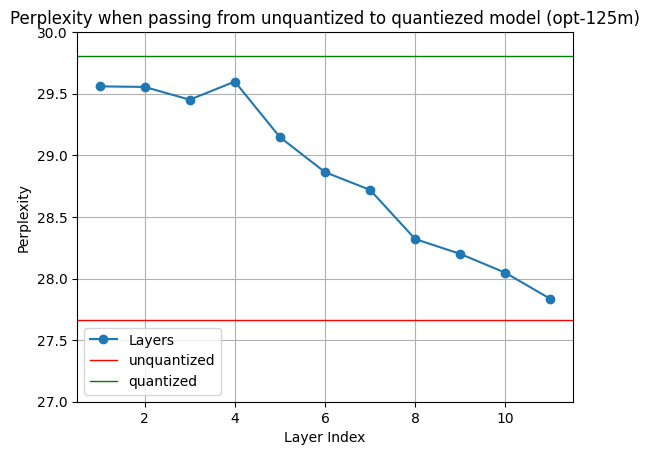

In [14]:
import matplotlib.pyplot as plt

values = [ 
    29.55970001220703,
    29.555158615112305,
    29.451440811157227,
    29.598485946655273,
    29.14733123779297,
    28.863269805908203,
    28.71947479248047,
    28.320405960083008,
    28.19976806640625,
    28.0467529296875,
    27.83431625366211,
]


# Create x values (0 to n-1 where n is the number of values)
x_values = list(range(1,len(values)+1))

# Create the line plot
plt.plot(x_values, values, label='Layers', marker='o')

# Set the y-axis limits to show values between 25 and 26
plt.ylim(27, 30)

plt.annotate('89.29', xy=(0.8, 44.9), xytext=(1.3, 44),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=12, color='black')

# Add grid, title, legend, and labels
plt.axhline(27.66, color='red', linestyle='-', linewidth=1, label='unquantized')  # Reference line
plt.axhline(29.804424285888672, color='green', linestyle='-', linewidth=1, label='quantized')
plt.title('Perplexity when passing from unquantized to quantiezed model (opt-125m)')
plt.xlabel('Layer Index')
plt.ylabel('Perplexity')
plt.legend()
plt.grid()

# Show the plot
plt.show()

In [123]:
import pandas as pd  
import itertools

df = pd.read_csv("F:/Thesis/AutoGPTQ/perplexity_estimation/output.txt", sep=r',(?=[^,]+$)', engine='python', header=None)
df.columns = ["Layers", "Perplexity"]

df["Layers"] = df["Layers"].apply(lambda x: list(eval(x.strip())))
df["Sum"] = df["Layers"].apply(lambda lst: sum(1 for item in lst if item)) 
df["Quantized_layers"] = df["Layers"].apply(lambda lst: [i+1 for i, item in enumerate(lst) if item])

df = df.sort_values(by="Perplexity", ascending=True)

df.to_csv("F:/Thesis/AutoGPTQ/perplexity_estimation/combinations.csv")

#Check that all layers where tested
layers = set(itertools.product([True, False], repeat=12))
tested_layers = set([tuple (x) for x in df["Layers"]])   

print(layers - tested_layers)

set()


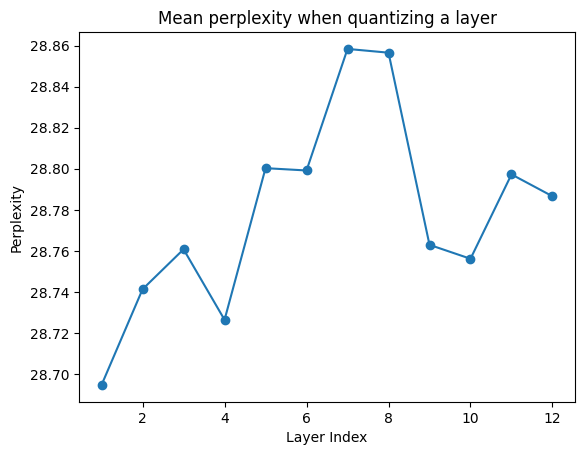

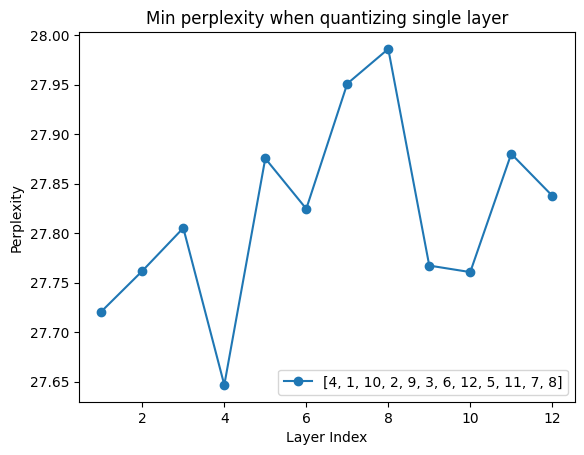

[(False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, True, False, False, False, False, False, False, False, False), (False, False, False, True, False, False, False, False, True, False, False, False), (True, False, True, True, False, False, False, False, False, False, False, False), (True, False, True, True, False, False, False, False, False, True, False, False), (True, False, True, True, False, False, False, False, True, True, False, False), (True, False, True, True, False, False, False, False, True, True, False, True), (True, False, True, True, True, True, False, False, True, True, False, False), (True, False, True, True, True, True, False, False, True, True, True, False), (True, True, True, True, True, True, False, False, True, True, False, True), (True, True, True, True, True, True, False, False, True, True, True, True), (True, True, True, True, True, True, True, False, True, True, True, True), (True, True, True, True, True, Tr

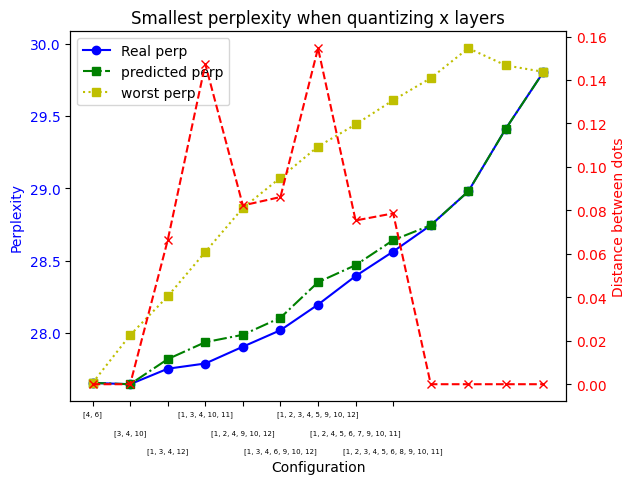

In [130]:
import matplotlib.pyplot as plt

#Plot the mean scores for each layer
mean_scores = []
for i in range(12):
    curr = df[df["Quantized_layers"].apply(lambda x: i+1 in x)]["Perplexity"].mean()
    mean_scores.append(curr)

x_values = list(range(1,13))

plt.plot(x_values,mean_scores, marker='o', linestyle='-')
plt.xlabel('Layer Index')
plt.ylabel('Perplexity')
plt.title('Mean perplexity when quantizing a layer')
plt.show()

#Plot the score for a singluary layer quantized
single_perplexity = df[df["Sum"] == 1].dropna().copy()
single_perplexity["Quantized_layers"] = single_perplexity["Quantized_layers"].apply(lambda x: x[0])
ordered_label = list(single_perplexity["Quantized_layers"])
single_perplexity = single_perplexity.sort_values(by="Quantized_layers")
plt.plot(x_values,list(single_perplexity["Perplexity"]), marker='o', linestyle='-', label = str(ordered_label))
plt.xlabel('Layer Index')
plt.ylabel('Perplexity')
plt.title('Min perplexity when quantizing single layer')
plt.legend()
plt.show()


#Plot the best combination for each layer that is quantized
best_perplexity = []
worst_perplexity = []
xtick_labels = []
predicted_perplexity = []
totest = []
for i in range(13):
    curr = df[df["Sum"] == i]
    best_perplexity.append(curr.iloc[0]["Perplexity"])
    worst_perplexity.append(curr.iloc[-1]["Perplexity"])
    if len(curr) > 12: 
        xtick_labels.append(str(curr.iloc[i]["Quantized_layers"])) 
    totest.append(tuple(curr.iloc[0]["Layers"])) 
    predicted_perplexity.append(df[df["Quantized_layers"].apply(lambda x: str(x) == str(sorted(ordered_label[:i])))]["Perplexity"])

print(totest)

import numpy as np

# Calculate distances between consecutive values
distances = [predicted_perplexity[i] - best_perplexity[i] for i in range(len(best_perplexity))]

#Least Squared problem
x_values = np.arange(len(best_perplexity))
X = np.column_stack([x_values**2, np.ones_like(x_values)])
coefficients = np.linalg.lstsq(X, best_perplexity, rcond=None)[0]
a, c = coefficients
fitted_curve = a * x_values**2 + c
fig, ax1 = plt.subplots()

ax1.plot(best_perplexity, marker='o', linestyle='-', color='b', label='Real perp')
#ax1.plot(fitted_curve, marker='s', linestyle='-.', color='g', label='a,c lstsq approximation (0.014, 27.65)')
ax1.plot(predicted_perplexity, marker='s', linestyle='-.', color='g', label='predicted perp')
ax1.plot(worst_perplexity, marker='s', linestyle=':', color='y', label='worst perp')
ax1.set_xlabel('Configuration')
plt.legend()

ax1.set_ylabel('Perplexity', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_title('Smallest perplexity when quantizing x layers')

# Create a secondary y-axis
ax2 = ax1.twinx()
ax2.plot(range(len(best_perplexity)), distances, marker='x', linestyle='--', color='r')
ax2.set_ylabel('Distance between dots', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Adjust the x-ticks to use the labels from xtick_labels
ax1.set_xticks(np.arange(len(xtick_labels)))  # Set the tick positions
ax1.set_xticklabels(xtick_labels)  # Set the labels and rotate them
ax1.tick_params(axis='x', labelsize=5)

# Offset every other label to avoid overlap
for i, label in enumerate(ax1.get_xticklabels()):
    if i % 3 == 1:  # Offset every other label (adjust as needed)
        label.set_y(-0.05)  # Move label downwards for readabilit
    if i % 3 == 2:  # Offset every other label (adjust as needed)
        label.set_y(-0.1)  # Move label downwards for readability
# Show the plot
plt.show()

L2 Loss

In [145]:
df = pd.read_csv("F:/Thesis/AutoGPTQ/perplexity_estimation/L2.txt", sep=r',(?=[^,]+$)', engine='python', header=None)
df.columns = ["Layers", "L2"]

df.drop_duplicates(inplace=True)
df["Layers"] = df["Layers"].apply(lambda x: list(eval(x.strip())))
df["Sum"] = df["Layers"].apply(lambda lst: sum(1 for item in lst if item)) 
df["Quantized_layers"] = df["Layers"].apply(lambda lst: [i+1 for i, item in enumerate(lst) if item])
df = df.sort_values(by="L2", ascending=True)
 


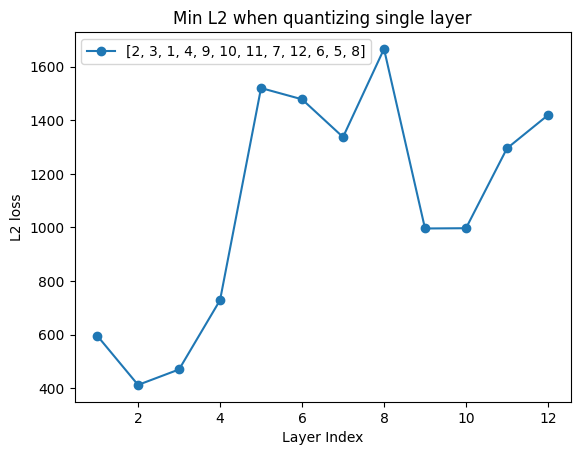

In [146]:
#Plot the score for a singluary layer quantized
x_values = list(range(1,13))
single_L2 = df[df["Sum"] == 1].dropna().copy()
single_L2["Quantized_layers"] = single_L2["Quantized_layers"].apply(lambda x: x[0])
ordered_label = list(single_L2["Quantized_layers"])
single_L2 = single_L2.sort_values(by="Quantized_layers")
plt.plot(x_values,list(single_L2["L2"]), marker='o', linestyle='-', label = str(ordered_label))
plt.xlabel('Layer Index')
plt.ylabel('L2 loss')
plt.title('Min L2 when quantizing single layer')
plt.legend()
plt.show()

['[]', '[2]', '[2, 3]', '[1, 2, 3]', '[1, 2, 3, 4]', '[1, 2, 3, 4, 10]', '[1, 2, 3, 4, 5, 10]', '[1, 2, 3, 4, 5, 10, 11]', '[1, 2, 3, 4, 5, 7, 9, 10]', '[1, 2, 3, 4, 5, 7, 9, 10, 11]', '[1, 2, 3, 4, 5, 6, 9, 10, 11, 12]', '[1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12]', '[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]']


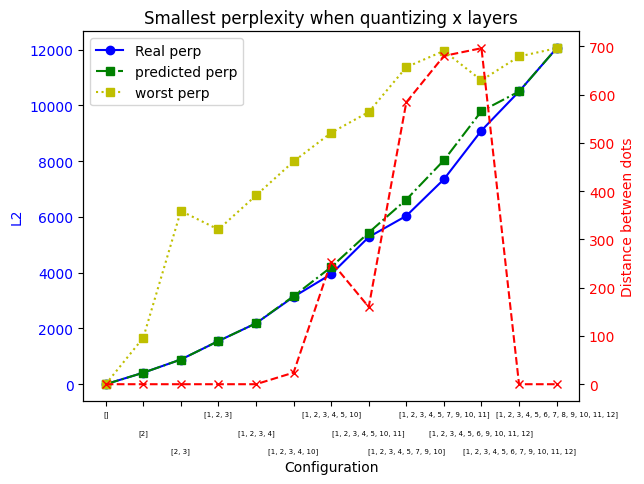

In [154]:
#Plot the best combination for each layer that is quantized
best_perplexity = []
worst_perplexity = []
xtick_labels = []
predicted_perplexity = []
totest = []
for i in range(13):
    curr = df[df["Sum"] == i]
    best_perplexity.append(curr.iloc[0]["L2"])
    worst_perplexity.append(curr.iloc[-1]["L2"])
    xtick_labels.append(str(curr.iloc[0]["Quantized_layers"])) 
    totest.append(tuple(curr.iloc[0]["Layers"]))  
    predicted_perplexity.append(df[df["Quantized_layers"].apply(lambda x: str(x) == str(sorted(ordered_label[:i])))]["L2"])
 
print(xtick_labels)


# Calculate distances between consecutive values
distances = [predicted_perplexity[i] - best_perplexity[i] for i in range(len(best_perplexity))]

#Least Squared problem
x_values = np.arange(len(best_perplexity))
X = np.column_stack([x_values**2, np.ones_like(x_values)])
coefficients = np.linalg.lstsq(X, best_perplexity, rcond=None)[0]
a, c = coefficients
fitted_curve = a * x_values**2 + c
fig, ax1 = plt.subplots()

ax1.plot(best_perplexity, marker='o', linestyle='-', color='b', label='Real perp')
#ax1.plot(fitted_curve, marker='s', linestyle='-.', color='g', label='a,c lstsq approximation (0.014, 27.65)')
ax1.plot(predicted_perplexity, marker='s', linestyle='-.', color='g', label='predicted perp')
ax1.plot(worst_perplexity, marker='s', linestyle=':', color='y', label='worst perp')
ax1.set_xlabel('Configuration')
plt.legend()

ax1.set_ylabel('L2', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_title('Smallest perplexity when quantizing x layers')

# Create a secondary y-axis
ax2 = ax1.twinx()
ax2.plot(range(len(best_perplexity)), distances, marker='x', linestyle='--', color='r')
ax2.set_ylabel('Distance between dots', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Adjust the x-ticks to use the labels from xtick_labels
ax1.set_xticks(np.arange(len(xtick_labels)))  # Set the tick positions
ax1.set_xticklabels(xtick_labels)  # Set the labels and rotate them
ax1.tick_params(axis='x', labelsize=5)


# Offset every other label to avoid overlap
for i, label in enumerate(ax1.get_xticklabels()):
    if i % 3 == 1:  # Offset every other label (adjust as needed)
        label.set_y(-0.05)  # Move label downwards for readabilit
    if i % 3 == 2:  # Offset every other label (adjust as needed)
        label.set_y(-0.1)  # Move label downwards for readability
# Show the plot
plt.show()

Working with condition numbers

In [46]:
@torch.no_grad
def get_condition(inp:torch.tensor, percent):
    inp = remove_largest_x_percent(inp,percent)
    pinv = torch.linalg.pinv(inp) 
    cond = torch.norm(pinv)*torch.norm(inp)
    return cond
    """
    # Calculate the condition number 
    ATA = inp.T @ inp

    # Compute eigenvalues of A^T A
    eigenvalues = torch.linalg.eigvals(ATA).real
    return eigenvalues.max()/eigenvalues.min()
    """
    
def remove_largest_x_percent(tensor, x_percent):
    flat_tensor = tensor.view(-1)
    abs_tensor = flat_tensor.abs()
    num_elements = flat_tensor.numel()
    num_to_remove = int(num_elements * (x_percent / 100))
    if num_to_remove == 0:
        return tensor  
    threshold = torch.topk(abs_tensor, num_to_remove, largest=True).values.min() #Get the values at the treshold
    mask = abs_tensor <= threshold  # Mask for keeping values
    flat_tensor[~mask] = 0  # Set the largest values to 0
    return flat_tensor.view_as(tensor)

Condition number of the weights

In [38]:
from transformers import OPTForCausalLM
import torch
from model_perplexity import get_wikitext2

model = OPTForCausalLM.from_pretrained("facebook/opt-125m").to("cuda:0")
layers = model.model.decoder.layers
cond_numbers = torch.zeros(12,6)

with torch.no_grad():
    for i,layer in enumerate(model.model.decoder.layers): 
        K = layer.self_attn.k_proj.weight
        V = layer.self_attn.v_proj.weight
        Q = layer.self_attn.q_proj.weight
        out = Q = layer.self_attn.out_proj.weight
        FC1 = layer.fc1.weight
        FC2 = layer.fc2.weight
        
        cond_numbers[i,0] = get_condition(K) 
        cond_numbers[i,1] = get_condition(V)
        cond_numbers[i,2] = get_condition(Q)
        cond_numbers[i,3] = get_condition(out)
        cond_numbers[i,4] = get_condition(FC1)
        cond_numbers[i,5] = get_condition(FC2) 

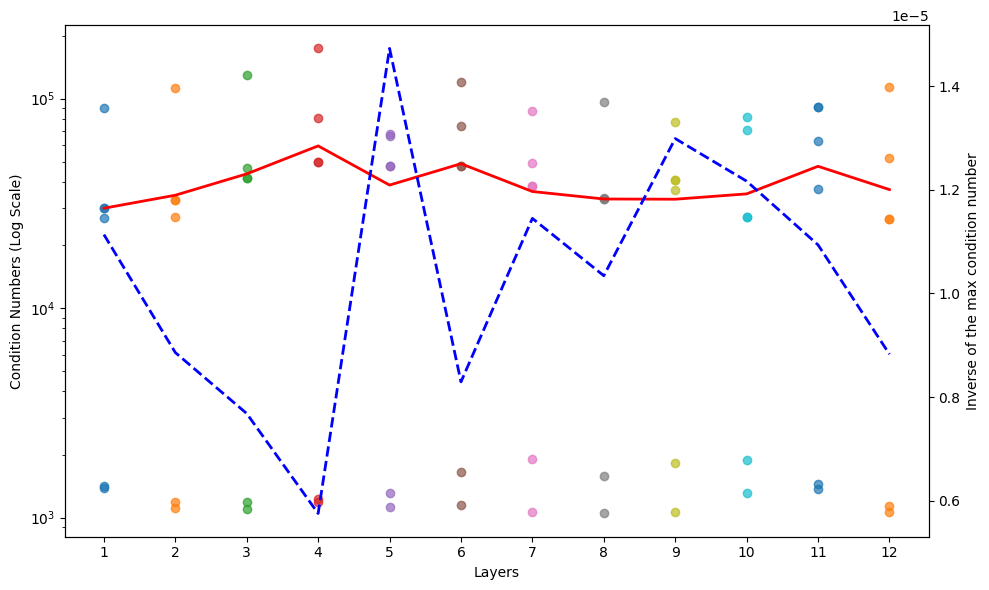

In [44]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# Number of rows and columns
num_rows, num_cols = cond_numbers.shape

# Create the plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Primary y-axis: Plot condition numbers
for row_idx in range(num_rows):
    # Scatter plot for the row
    x_vals = [row_idx + 1] * num_cols  # X values start from 1
    y_vals = cond_numbers[row_idx].numpy()  # Convert row tensor to numpy array
    ax1.scatter(x_vals, y_vals, alpha=0.7)

# Plot mean condition numbers on the primary y-axis
means = cond_numbers.mean(axis=1)
ax1.plot(range(1, num_rows + 1), means, color='red', linewidth=2)

# Add labels for primary y-axis
ax1.set_xlabel("Layers")
ax1.set_ylabel("Condition Numbers (Log Scale)")
ax1.set_xticks(range(1, num_rows + 1))
ax1.set_yscale('log') 

# Secondary y-axis: Plot inverse of the maximum values
ax2 = ax1.twinx()  # Create a second y-axis
maxs = cond_numbers.max(axis=1).values
inverted_maxs = 1 / maxs  # Inverse of the max values
ax2.plot(range(1, num_rows + 1), inverted_maxs, color='blue', linewidth=2, linestyle='--', label="Inverse Max")
ax2.set_ylabel("Inverse of the max condition number")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


Remove to x percent and measure the condition number

In [55]:

percents = [0,0.001,0.01,0.1,0.5,1,2,3.5,5,10]
cond_numbers = torch.zeros(10,12,6)

with torch.no_grad():
    for j,percent in enumerate(percents):
        model = OPTForCausalLM.from_pretrained("facebook/opt-125m").to("cuda:0")
        layers = model.model.decoder.layers
        for i,layer in enumerate(model.model.decoder.layers): 
            K = layer.self_attn.k_proj.weight
            V = layer.self_attn.v_proj.weight
            Q = layer.self_attn.q_proj.weight
            out = Q = layer.self_attn.out_proj.weight
            FC1 = layer.fc1.weight
            FC2 = layer.fc2.weight
            
            cond_numbers[j,i,0] = get_condition(K,percent) 
            cond_numbers[j,i,1] = get_condition(V,percent) 
            cond_numbers[j,i,2] = get_condition(Q,percent) 
            cond_numbers[j,i,3] = get_condition(out,percent) 
            cond_numbers[j,i,4] = get_condition(FC1,percent) 
            cond_numbers[j,i,5] = get_condition(FC2,percent) 

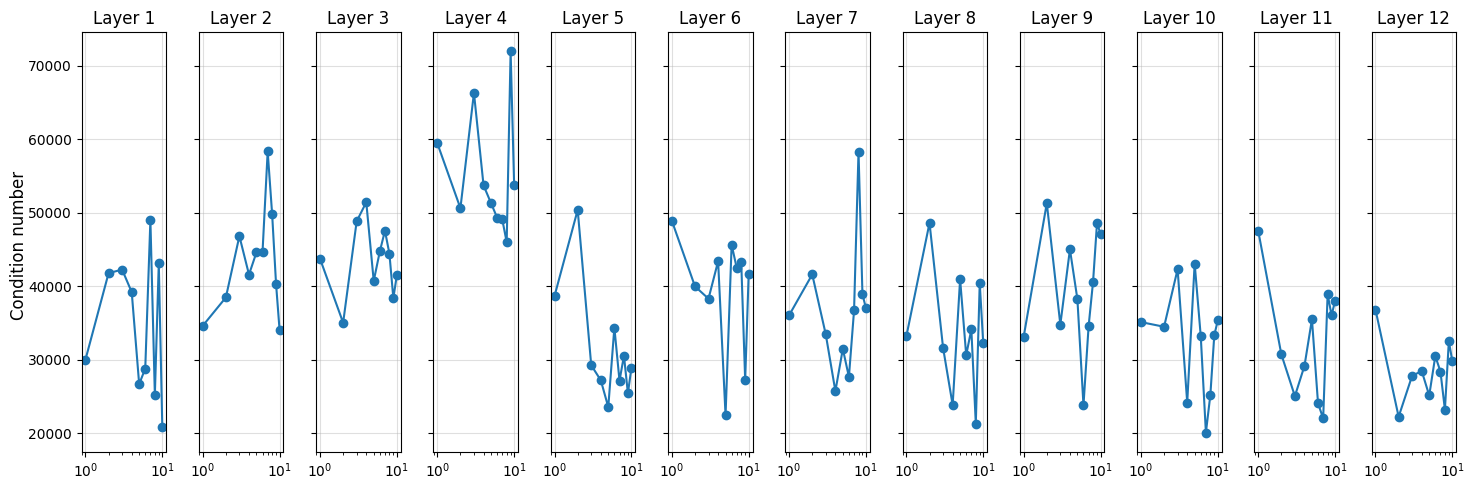

In [56]:
tensor = cond_numbers.mean(axis=2)


# Tensor dimensions
num_rows, num_cols = tensor.shape

# Create the figure and subplots
fig, axes = plt.subplots(1, num_cols, figsize=(15, 5), sharey=True)

# Iterate over each column and plot
for col_idx in range(num_cols):
    axes[col_idx].plot(range(1, num_rows + 1), tensor[:, col_idx].numpy(), marker='o')
    axes[col_idx].set_title(f'Layer {col_idx + 1}')
    axes[col_idx].set_xticks(percents)
    axes[col_idx].set_xscale('log')
    axes[col_idx].grid(alpha=0.4)

# Add shared labels
fig.supylabel("Condition number")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [ ]:
X = torch.randn(768,2048)*10
W = torch.randn(768,768)*10
B = W@X
W2 = torch.linalg.pinv(X).T @ B.T
print(W.T-W2)

In [ ]:
traindataset, testenc = get_wikitext2(128, 0, 2048, "facebook/opt-125m") 

In [126]:

from tqdm import tqdm
inps = []
with torch.no_grad():
    for batch in tqdm(traindataset):
        #Load tensors on the GPU
        batch['input_ids'] = batch['input_ids'].to("cuda:0")
        batch['attention_mask'] = batch['attention_mask'].to("cuda:0") 
        #Outputs of the base model across all the layers
        hidden = model(**batch, output_hidden_states=True)
        #Get outputs of the layer before we prune
        inps.append([state.cpu() for state in hidden.hidden_states]) 
    

100%|██████████| 128/128 [02:31<00:00,  1.18s/it]


In [127]:
conditions = torch.zeros(128,12)
from tqdm import trange
for j in trange(128):
    for i in range(12):
        inps[j][i] = inps[j][i].to("cuda:0")
        curr = torch.squeeze(inps[j][i])
        conditions[j,i] = get_condition(curr).cpu().item()
        inps[j][i] = inps[j][i].cpu()

100%|██████████| 128/128 [14:42<00:00,  6.90s/it]


NameError: name 'conditions' is not defined

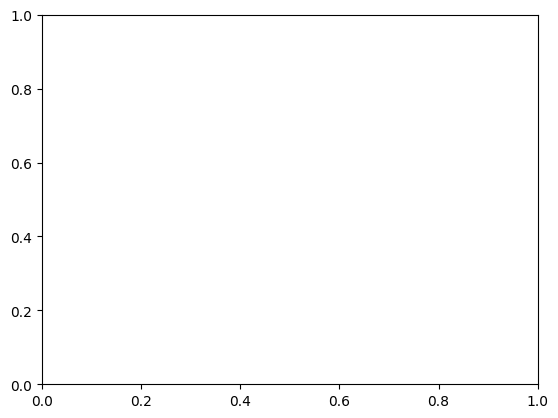

In [1]:
from matplotlib import pyplot as plt

fig, ax1 = plt.subplots()
plt.plot(conditions.mean(axis=0))
#ax1.set_xticklabels(list(range(1,13)))  # Set the labels and rotate them
plt.show()

In [43]:
import torch
decoder_layer = model.model.decoder.layers[0]


# Define a random input tensor
# Let's assume a batch size of 1 and a sequence length of 10, with hid


# Pass the random input through the extracted decoder layer
# The layer expects hidden states as input; depending on the model setup, attention_mask may also be needed.
with torch.no_grad():
    output = decoder_layer(torch.load('F:/Thesis/in.pt'))

torch.save(output, 'F:/Thesis/test.pt')  